1. Thu thập và xử lý dữ liệu
a. Overview of data

In [1]:
#Import library
import numpy as np  #for numeric operations
import pandas as pd #to analyse,clean,filter,manipulate ,explore datasets
import matplotlib.pyplot as plt #Data visuvalization and analysis matplotlib inline
import seaborn as sns #for advance visuvalizations with matplotlib
from IPython.display import Image  #importing libary to display the image
import os #import operating system to direct the folders
import datetime # datetime is useful to date_time series analysis

In [2]:
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

In [3]:
linkedin_skills=pd.read_csv('C:/HocTap/DoAnTotNghiep/archive/job_skills.csv')
linkedin_skills.head(10)

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St..."
5,https://www.linkedin.com/jobs/view/senior-lead...,"Access Control, Video Management Systems, IPba..."
6,https://www.linkedin.com/jobs/view/program-con...,"Consultation, Supervision, InService Training,..."
7,https://www.linkedin.com/jobs/view/veterinary-...,"Veterinary Receptionist, AAHAaccredited, Custo..."
8,https://www.linkedin.com/jobs/view/sr-technici...,"Optical Inspection Equipment Programming, MS E..."
9,https://www.linkedin.com/jobs/view/experienced...,"HVAC, troubleshooting, Preventative maintenanc..."


In [4]:
linkedin_skills.isna().sum()

job_link         0
job_skills    2085
dtype: int64

In [5]:
# Hoặc, nếu linkedin_skills là một danh sách
total_skills = len(linkedin_skills)
print(f"Tổng số kỹ năng: {total_skills}")

Tổng số kỹ năng: 1296381


In [28]:
linkedin_skills = linkedin_skills.dropna()

In [36]:
skills_list = []

for skill in linkedin_skills.job_skills:
    if isinstance(skill, str):
        skills_list.append(skill.lower())

# Ghép chuỗi rồi tách thành danh sách
all_skills = ', '.join(skills_list).split(', ')

# Hiển thị 10 kỹ năng đầu tiên và tổng số
# print((all_skills[:10], len(all_skills)))
# In 10 kỹ năng đầu tiên, mỗi kỹ năng một dòng
print("Top 10 skills:")
for skill in all_skills[:10]:
    print(skill)

# In tổng số kỹ năng
print("\nTổng số kỹ năng:", len(all_skills))



Top 10 skills:
building custodial services
cleaning
janitorial services
materials handling
housekeeping
sanitation
waste management
floor maintenance
equipment maintenance
safety protocols

Tổng số kỹ năng: 26925254


In [37]:
skills = []
for skill_str in linkedin_skills.job_skills:
    if isinstance(skill_str, str):
        skill_items = [s.strip().lower() for s in skill_str.split(',') if s.strip()]
        skills.extend(skill_items)

from collections import Counter
counts = Counter(skills)
common_skills = counts.most_common(15)

# In kết quả thành 1 cột
for skill, count in common_skills:
    print(f'{skill}: {count}')


communication: 370143
customer service: 278102
teamwork: 227609
communication skills: 195949
leadership: 185187
problem solving: 149032
time management: 142911
attention to detail: 133975
problemsolving: 129329
project management: 121563
interpersonal skills: 100267
patient care: 99926
sales: 93031
nursing: 88015
collaboration: 87116


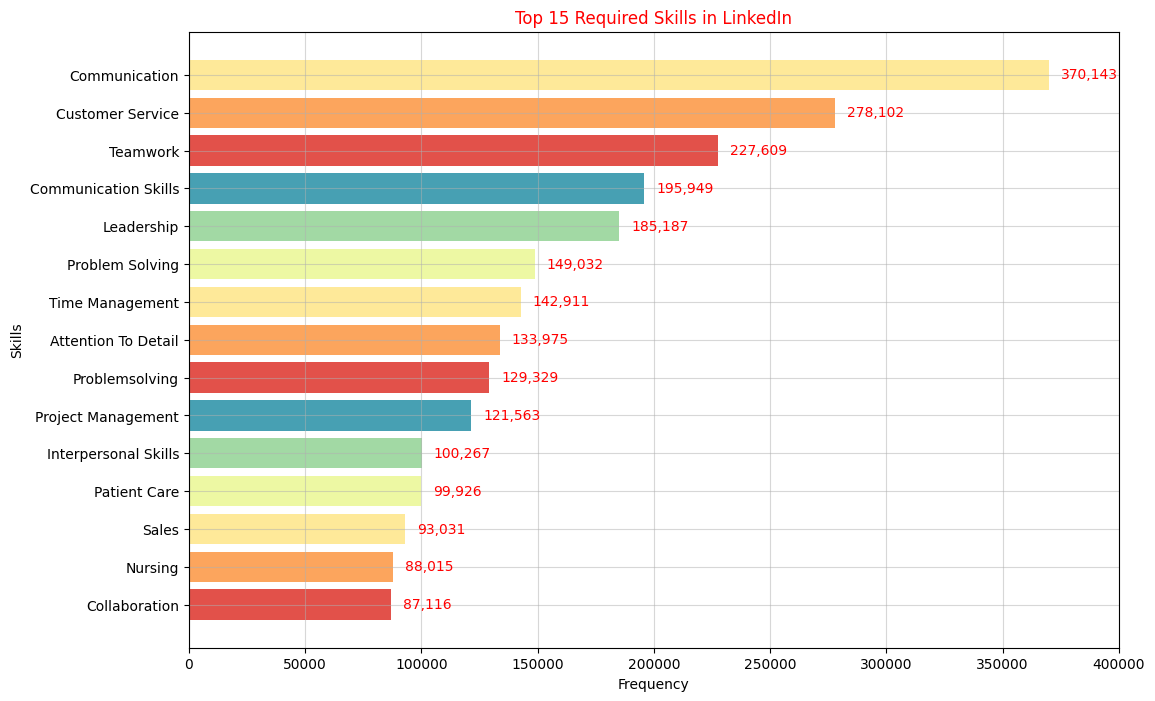

In [38]:
# Set the same labels and values from the mock common_skills data
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))

# Formatting the number with commas and displaying it with a small distance from the bars
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 5000  # Adding a small distance from the end of the bar
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f"{width:,.0f}", va='center', color='red')

plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('Top 15 Required Skills in LinkedIn', color='red')

# Display both horizontal and vertical grid lines
plt.grid(axis='both', linestyle='-', alpha=0.5)

# Change the x-axis limit to 400,000
plt.xlim(0, 400_000)
plt.show()

In [7]:
linkedin_jobs=pd.read_csv('C:/HocTap/DoAnTotNghiep/archive/job_summary.csv')
linkedin_jobs.head(10)

,job_link,job_summary
0,https://www.linkedin.com/jobs/view/restaurant-...,Rock N Roll Sushi is hiring a Restaurant Manag...
1,https://www.linkedin.com/jobs/view/med-surg-re...,Schedule\n: PRN is required minimum 12 hours p...
2,https://www.linkedin.com/jobs/view/registered-...,Description\nIntroduction\nAre you looking for...
3,https://uk.linkedin.com/jobs/view/commercial-a...,Commercial account executive\nSheffield\nFull ...
4,https://www.linkedin.com/jobs/view/store-manag...,Address:\nUSA-CT-Newington-44 Fenn Road\nStore...
5,https://www.linkedin.com/jobs/view/restaurant-...,Description\nOur\nRestaurant Team/Shift Leader...
6,https://www.linkedin.com/jobs/view/hair-stylis...,Company Description\nJobs for Humanity is part...
7,https://uk.linkedin.com/jobs/view/concession-s...,An exciting opportunity has arisen for a Conce...
8,https://www.linkedin.com/jobs/view/material-ha...,Job Details:\nJob Title : Quality Liaison (599...
9,https://www.linkedin.com/jobs/view/restaurant-...,Our\nRestaurant Team/Shift Leaders\nhave a dua...


In [8]:
linkedin_jobs.isna().sum()

job_link       0
job_summary    0
dtype: int64

In [9]:
linkedin_posts=pd.read_csv('C:/HocTap/DoAnTotNghiep/archive/linkedin_job_postings.csv')
linkedin_posts.head(10)

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite
5,https://www.linkedin.com/jobs/view/counselor-0...,2024-01-19 09:45:09.215838+00,f,f,f,Counselor-07532802,ICL,"Brooklyn, NY",2024-01-16,Oyster Bay,United States,Residence Counselor,Mid senior,Onsite
6,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 08:08:19.663033+00,t,t,f,Registered Nurse (RN),Trinity Health MI,"Muskegon, MI",2024-01-14,Muskegon,United States,Nurse Practitioner,Mid senior,Onsite
7,https://www.linkedin.com/jobs/view/part-time-h...,2024-01-21 08:08:19.912883+00,t,t,f,Part Time- HR Generalist,Creative Financial Staffing (CFS),"New York, NY",2024-01-16,White Plains,United States,Human Resource Advisor,Mid senior,Onsite
8,https://uk.linkedin.com/jobs/view/store-manage...,2024-01-21 08:08:20.658147+00,t,t,f,Store Manager,B&M Retail,"London, England, United Kingdom",2024-01-15,Slough,United Kingdom,Double,Mid senior,Onsite
9,https://ca.linkedin.com/jobs/view/engineering-...,2024-01-21 08:08:20.998834+00,t,t,f,Engineering Project Coordinator,Shared Health-Soins Communs,"Winnipeg, Manitoba, Canada",2024-01-14,Manitoba,Canada,Program Coordinator,Mid senior,Onsite


In [10]:
linkedin_posts.describe()  #gives the summary about the dataset in detailed form

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
count,1348454,1348454,1348454,1348454,1348454,1348454,1348443,1348435,1348454,1348454,1348454,1348454,1348454,1348454
unique,1348454,722748,2,2,2,584544,90605,29153,6,1018,4,1993,2,3
top,https://www.linkedin.com/jobs/view/account-exe...,2024-01-19 09:45:09.215838+00,t,t,f,LEAD SALES ASSOCIATE-FT,Health eCareers,"New York, NY",2024-01-14,Baytown,United States,Account Executive,Mid senior,Onsite
freq,1,625540,1297877,1296401,1346978,7325,41598,13436,460035,10052,1149342,19468,1204445,1337633


In [11]:
linkedin_posts.info()#gives the information like datatypes and null count for every columns and rows in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348454 entries, 0 to 1348453
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   job_link             1348454 non-null  object
 1   last_processed_time  1348454 non-null  object
 2   got_summary          1348454 non-null  object
 3   got_ner              1348454 non-null  object
 4   is_being_worked      1348454 non-null  object
 5   job_title            1348454 non-null  object
 6   company              1348443 non-null  object
 7   job_location         1348435 non-null  object
 8   first_seen           1348454 non-null  object
 9   search_city          1348454 non-null  object
 10  search_country       1348454 non-null  object
 11  search_position      1348454 non-null  object
 12  job_level            1348454 non-null  object
 13  job_type             1348454 non-null  object
dtypes: object(14)
memory usage: 144.0+ MB


b. Data cleaning

In [12]:
mask=linkedin_posts.isnull()    #isnullfunctions checks for null in dataset and gives boolean output 
linkedin_posts[mask]            #mask is variable which stores True values
                                # in this dataset doesnt have any null values so it showing NaN

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1348450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1348451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1348452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
print(linkedin_posts.isnull().sum()) # null values in some columns(company and job_location)z

job_link                0
last_processed_time     0
got_summary             0
got_ner                 0
is_being_worked         0
job_title               0
company                11
job_location           19
first_seen              0
search_city             0
search_country          0
search_position         0
job_level               0
job_type                0
dtype: int64


In [14]:
linkedin_posts.dropna(subset=['company', 'job_location'], inplace=True)

In [15]:
print(linkedin_posts.isnull().sum())

job_link               0
last_processed_time    0
got_summary            0
got_ner                0
is_being_worked        0
job_title              0
company                0
job_location           0
first_seen             0
search_city            0
search_country         0
search_position        0
job_level              0
job_type               0
dtype: int64


In [16]:
del linkedin_posts["got_summary"]       #deleting  unnesccesary column 
del linkedin_posts["got_ner"]           #deleting unneccesary column 
del linkedin_posts["is_being_worked"]   #deleting unneccesary column 
linkedin_posts.head()

,job_link,last_processed_time,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite


In [17]:
linkedin_posts.duplicated(subset=["job_link","last_processed_time","job_title", "company",
                                  "job_location","first_seen","search_city","search_country",
                                  "search_position","job_level","job_type"])
                                  
#checks for duplicates in this dataset

0          False
1          False
2          False
3          False
4          False
           ...  
1348449    False
1348450    False
1348451    False
1348452    False
1348453    False
Length: 1348424, dtype: bool

In [18]:
linkedin_posts.nunique()  #give the count of unique numbers in dataset by columns vise

job_link               1348424
last_processed_time     722737
job_title               584534
company                  90604
job_location             29153
first_seen                   6
search_city               1018
search_country               4
search_position           1993
job_level                    2
job_type                     3
dtype: int64

c. Data visuvalization

In [19]:
linkedin_posts.describe()

,job_link,last_processed_time,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
count,1348424,1348424,1348424,1348424,1348424,1348424,1348424,1348424,1348424,1348424,1348424
unique,1348424,722737,584534,90604,29153,6,1018,4,1993,2,3
top,https://www.linkedin.com/jobs/view/account-exe...,2024-01-19 09:45:09.215838+00,LEAD SALES ASSOCIATE-FT,Health eCareers,"New York, NY",2024-01-14,Baytown,United States,Account Executive,Mid senior,Onsite
freq,1,625521,7325,41597,13435,460029,10052,1149323,19468,1204420,1337603


1 - Những công việc tuyển dụng nhiều nhất trong tập dữ liệu

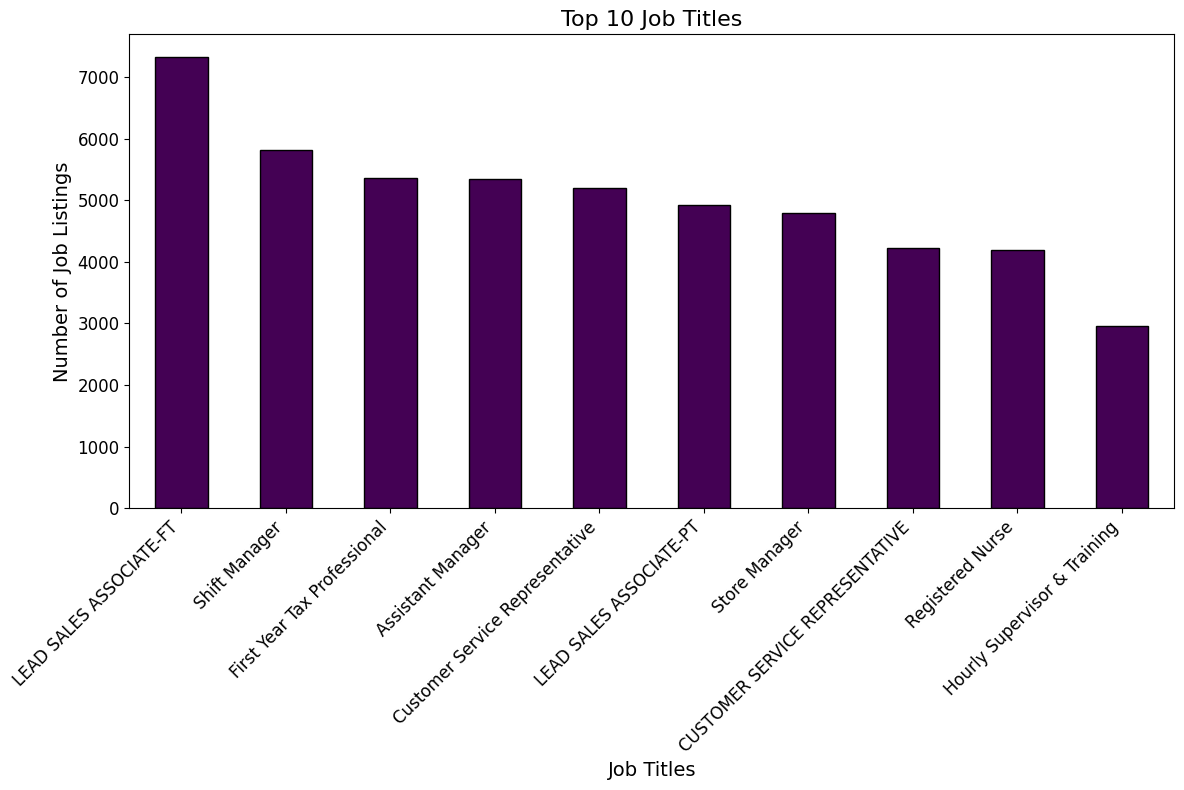

In [20]:
#Explore job titles
plt.figure(figsize=(12, 8))
colors = sns.color_palette('viridis', len(linkedin_posts['job_title'].unique()))  # You can choose a different color palette

top_job_titles = linkedin_posts['job_title'].value_counts().head(10)
top_job_titles.plot(kind='bar', color=colors, edgecolor='black')

plt.title('Top 10 Job Titles', fontsize=16)
plt.xlabel('Job Titles', fontsize=14)
plt.ylabel('Number of Job Listings', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

2 - Những công ty hàng đầu cung cấp việc làm trong tập dữ liệu

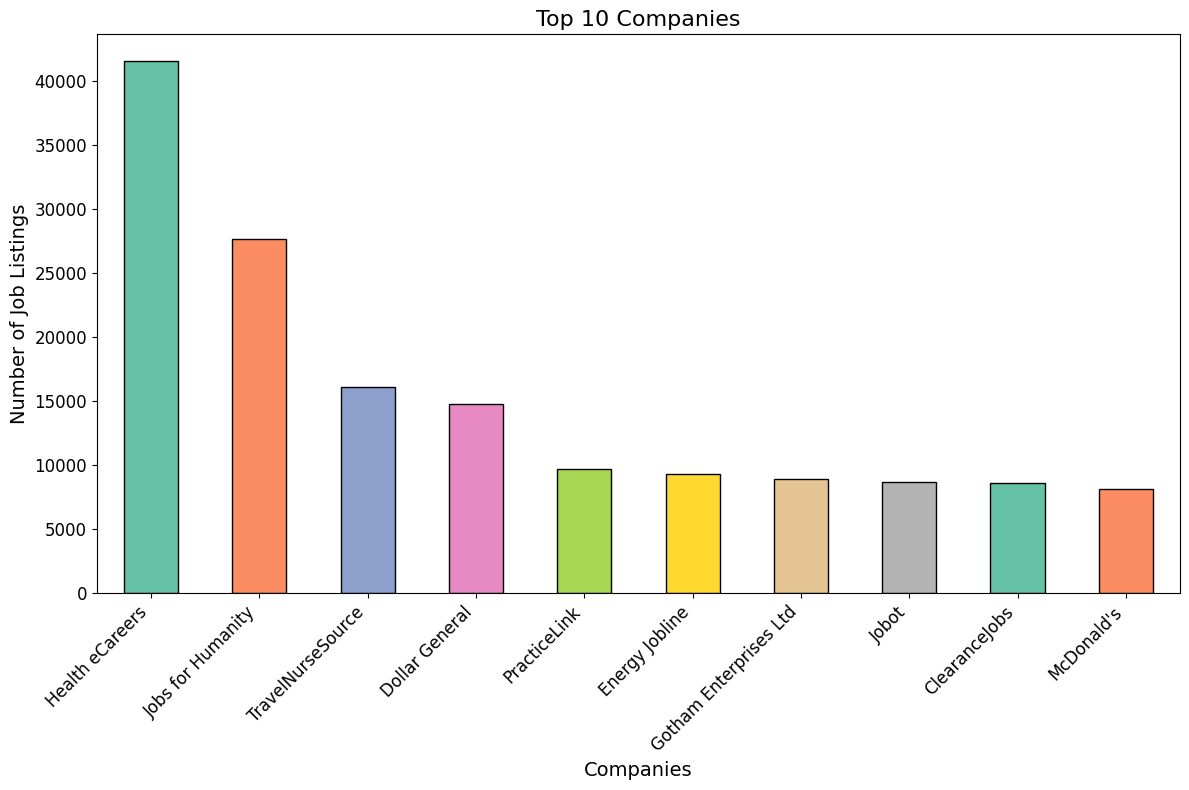

In [21]:
# Explore companies
plt.figure(figsize=(12, 8))
colors = sns.color_palette('Set2', len(linkedin_posts['company'].unique()))  # You can choose a different color palette

top_companies = linkedin_posts['company'].value_counts().head(10)
top_companies.plot(kind='bar', color=colors, edgecolor='black')

plt.title('Top 10 Companies', fontsize=16)
plt.xlabel('Companies', fontsize=14)
plt.ylabel('Number of Job Listings', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

3 - Những địa điểm tuyển dụng nhiều nhất trong tập dữ liệu

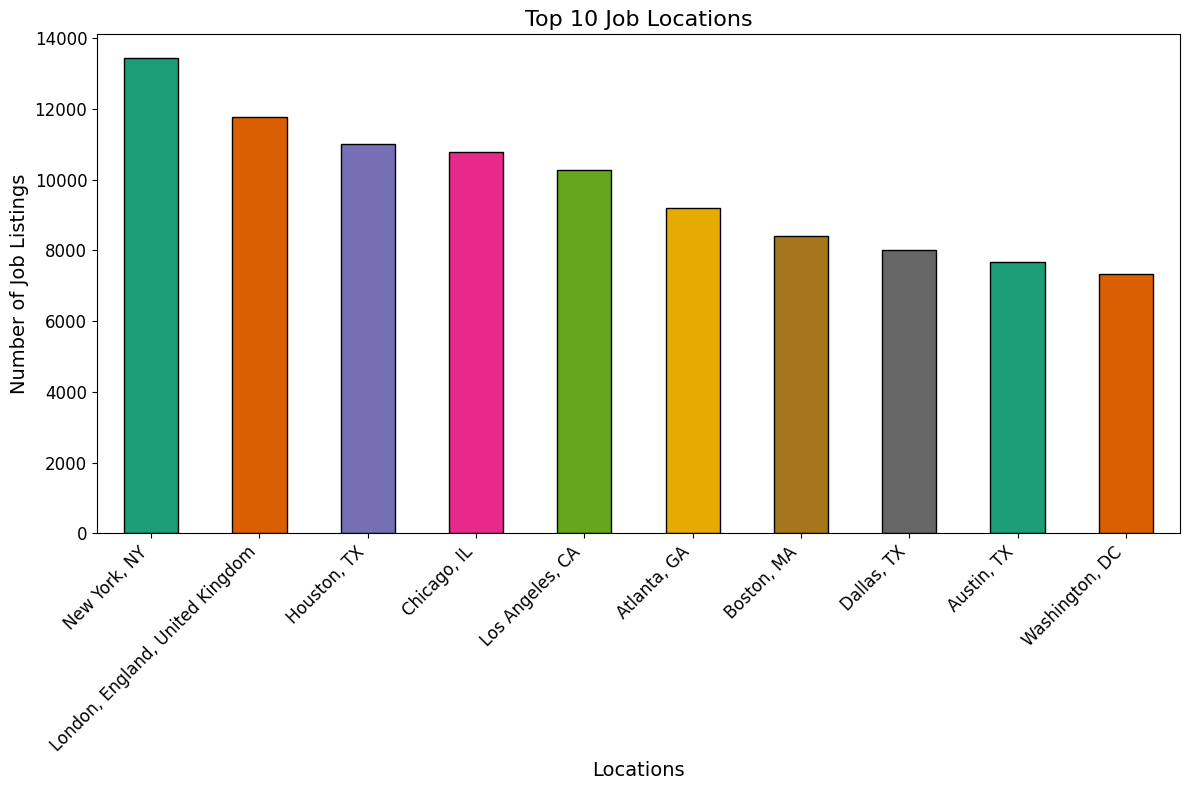

In [22]:
# Explore job locations 
plt.figure(figsize=(12, 8))
colors = sns.color_palette('Dark2', len(linkedin_posts['job_location'].unique()))  # You can choose a different color palette

top_locations = linkedin_posts['job_location'].value_counts().head(10)
top_locations.plot(kind='bar', color=colors, edgecolor='black')

plt.title('Top 10 Job Locations', fontsize=16)
plt.xlabel('Locations', fontsize=14)
plt.ylabel('Number of Job Listings', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

4 - Số lượng vị trí yêu cầu trong công việc

In [23]:
level=linkedin_posts['job_level'].value_counts()
level

job_level
Mid senior    1204420
Associate      144004
Name: count, dtype: int64

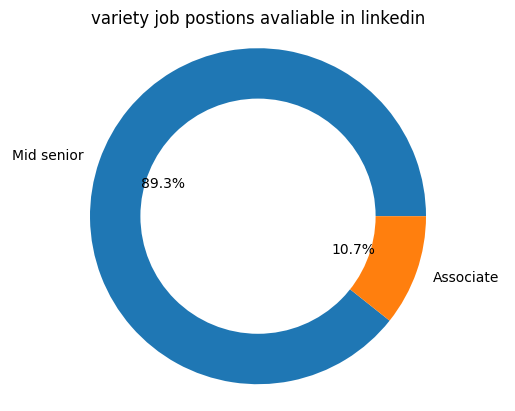

In [24]:
plt.pie(level,labels=level.index,autopct='%1.1f%%')
cen_cir=plt.Circle((0,0),0.70,fc='white')
fig=plt.gcf()
fig.gca().add_artist(cen_cir)
plt.axis('equal')
plt.title('variety job postions avaliable in linkedin')
plt.show()

5 - Các hình thức làm việc trong tập dữ liệu

In [25]:
job_type=linkedin_posts["job_type"].value_counts()
job_type

job_type
Onsite    1337603
Hybrid       6562
Remote       4259
Name: count, dtype: int64

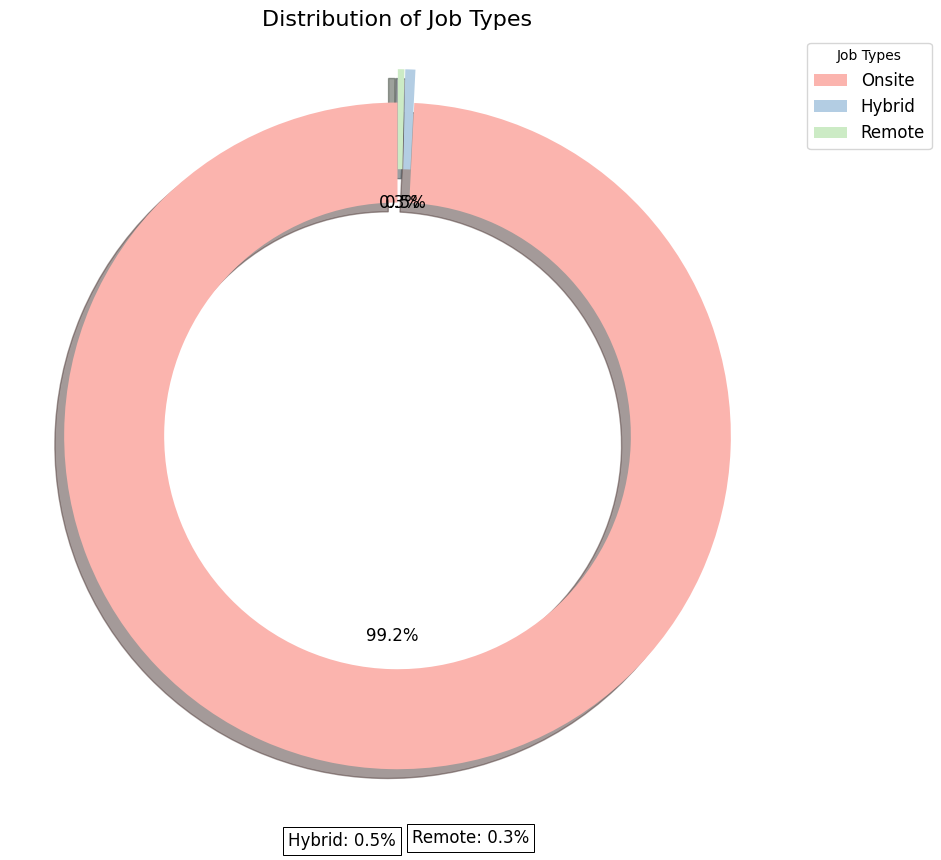

In [27]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 10))
colors = sns.color_palette('Pastel1', len(linkedin_posts['job_type'].unique()))

job_type_distribution = linkedin_posts['job_type'].value_counts()

# Lấy danh sách các loại công việc và phần trăm tương ứng
job_types = job_type_distribution.index.tolist()
percentages = job_type_distribution.values / job_type_distribution.sum() * 100

# Tìm vị trí của "Remote" và "Hybrid"
vi_tri_remote = job_types.index('Remote')
vi_tri_hybrid = job_types.index('Hybrid')

# Tạo mảng explode mới (tùy chọn, nếu bạn muốn tách các phần)
explode = [0] * len(job_types)
explode[vi_tri_remote] = 0.1
explode[vi_tri_hybrid] = 0.1

# Vẽ biểu đồ tròn. ĐÃ SỬA LỖI Ở ĐÂY
wedges, _, _ = plt.pie(job_type_distribution, autopct='%1.1f%%', colors=colors, 
                    startangle=90, explode=explode, shadow=True, 
                    wedgeprops=dict(width=0.3),
                    textprops={'fontsize': 12})

plt.title('Distribution of Job Types', fontsize=16)
plt.axis('equal')

# Chú thích (legend)
plt.legend(job_type_distribution.index, title='Job Types', loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=12)

# Hiển thị phần trăm cho "Remote" và "Hybrid" dưới biểu đồ
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)

offset = 10
# Lấy góc của wedge cho Remote và Hybrid
angle_remote = (wedges[vi_tri_remote].theta1 + wedges[vi_tri_remote].theta2) / 2 - offset
angle_hybrid = (wedges[vi_tri_hybrid].theta1 + wedges[vi_tri_hybrid].theta2) / 2 + offset

# Chuyển đổi góc sang radian
angle_remote_rad = np.deg2rad(angle_remote)
angle_hybrid_rad = np.deg2rad(angle_hybrid)

# Tính toán vị trí x, y để đặt text. Điều chỉnh bán kính (radius) nếu cần.
radius = 1.2
x_remote = radius * np.cos(angle_remote_rad)
y_remote = radius * np.sin(angle_remote_rad)
x_hybrid = radius * np.cos(angle_hybrid_rad)
y_hybrid = radius * np.sin(angle_hybrid_rad)

plt.text(x_remote, -y_remote, f"Remote: {percentages[vi_tri_remote]:.1f}%", 
         ha='center', va='top', fontsize=12, bbox=bbox_props)
plt.text(x_hybrid, -y_hybrid, f"Hybrid: {percentages[vi_tri_hybrid]:.1f}%", 
         ha='center', va='top', fontsize=12, bbox=bbox_props)

plt.show()